## Autoencoder transformation (encode-decode)

Considering a dataset with $p$ numerical attributes. 

The goal of the autoencoder is to reduce the dimension of $p$ to $k$, such that these $k$ attributes are enough to recompose the original $p$ attributes. However from the $k$ dimensionals the data is returned back to $p$ dimensions. The higher the quality of autoencoder the similiar is the output from the input. 

In [1]:
# DAL ToolBox
# version 1.0.777

source("https://raw.githubusercontent.com/cefet-rj-dal/daltoolbox/main/jupyter.R")

#loading DAL
load_library("daltoolbox")

Loading required package: usethis

ℹ Loading daltoolbox
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



### dataset for example 

In [2]:
data(sin_data)

sw_size <- 5
ts <- ts_data(sin_data$y, sw_size)

ts_head(ts)


t4,t3,t2,t1,t0
0.0000000,0.2474040,0.4794255,0.6816388,0.8414710
0.2474040,0.4794255,0.6816388,0.8414710,0.9489846
0.4794255,0.6816388,0.8414710,0.9489846,0.9974950
0.6816388,0.8414710,0.9489846,0.9974950,0.9839859
0.8414710,0.9489846,0.9974950,0.9839859,0.9092974
0.9489846,0.9974950,0.9839859,0.9092974,0.7780732


### applying data normalization

In [3]:
preproc <- ts_norm_gminmax()
preproc <- fit(preproc, ts)
ts <- transform(preproc, ts)

ts_head(ts)

t4,t3,t2,t1,t0
0.5004502,0.6243512,0.7405486,0.8418178,0.9218625
0.6243512,0.7405486,0.8418178,0.9218625,0.9757058
0.7405486,0.8418178,0.9218625,0.9757058,1.0000000
0.8418178,0.9218625,0.9757058,1.0000000,0.9932346
0.9218625,0.9757058,1.0000000,0.9932346,0.9558303
0.9757058,1.0000000,0.9932346,0.9558303,0.8901126


### spliting into training and test

In [4]:
samp <- ts_sample(ts, test_size = 10)
train <- as.data.frame(samp$train)
test <- as.data.frame(samp$test)

### creating autoencoder
Reduce from 5 to 3 dimensions

In [5]:
auto <- aae_encode_decode(5, 3, batch_size=3, num_epochs=1500)

auto <- fit(auto, train)

### learning curves

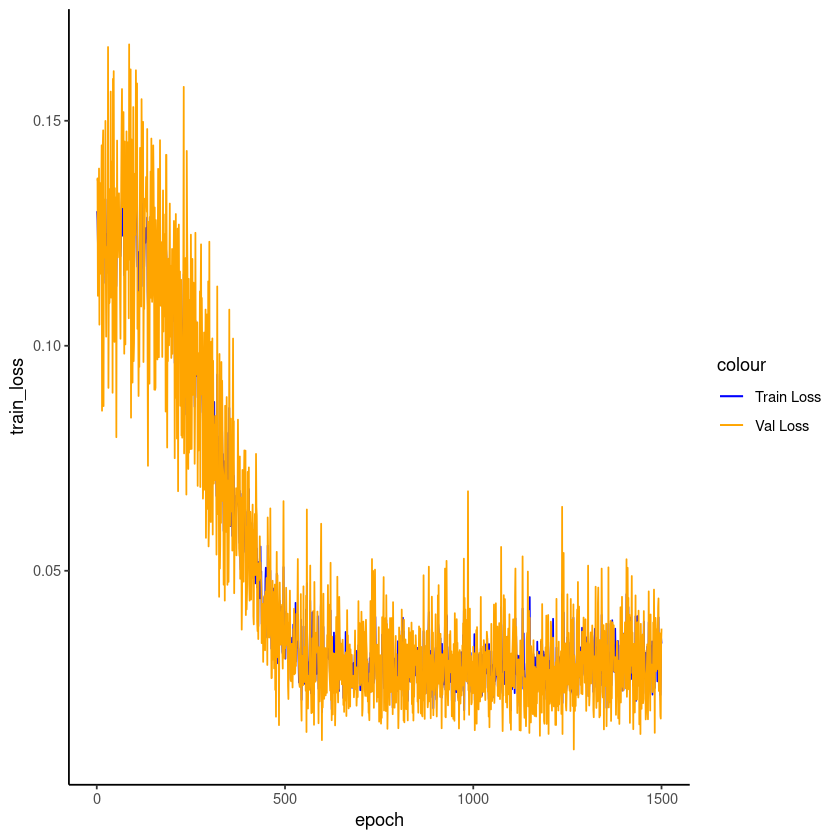

In [6]:
train_loss <- unlist(auto$model$train_loss)
val_loss <- unlist(auto$model$val_loss)

fit_loss <- as.data.frame(cbind(train_loss, val_loss))
fit_loss['epoch'] <- 1:nrow(fit_loss)

ggplot(fit_loss, aes(x=epoch)) +
geom_line(aes(y=train_loss, colour='Train Loss')) +
geom_line(aes(y=val_loss, colour='Val Loss')) +
scale_color_manual(values=c('Blue','Orange')) +
theme_classic()

### testing autoencoder
presenting the original test set and display encoding

In [7]:
print(head(test))
result <- transform(auto, test)
print(head(result))

         t4        t3        t2        t1        t0
1 0.7258342 0.8294719 0.9126527 0.9702046 0.9985496
2 0.8294719 0.9126527 0.9702046 0.9985496 0.9959251
3 0.9126527 0.9702046 0.9985496 0.9959251 0.9624944
4 0.9702046 0.9985496 0.9959251 0.9624944 0.9003360
5 0.9985496 0.9959251 0.9624944 0.9003360 0.8133146
6 0.9959251 0.9624944 0.9003360 0.8133146 0.7068409
          [,1]      [,2]      [,3]      [,4]      [,5]
[1,] 0.8571710 0.9096917 0.9259707 0.9258667 0.8865048
[2,] 0.8843125 0.9329557 0.9469124 0.9472755 0.9112817
[3,] 0.8954680 0.9418680 0.9548832 0.9551880 0.9212811
[4,] 0.8936266 0.9404774 0.9535921 0.9539037 0.9196819
[5,] 0.8773720 0.9272422 0.9416451 0.9419741 0.9049940
[6,] 0.8434722 0.8972391 0.9142281 0.9137236 0.8737113


In [8]:
result <- as.data.frame(result)
names(result) <- names(test)
r2 <- c()
mape <- c()
for (col in names(test)){
r2_col <- cor(test[col], result[col])^2
r2 <- append(r2, r2_col)
mape_col <- mean((abs((result[col] - test[col]))/test[col])[[col]])
mape <- append(mape, mape_col)
print(paste(col, 'R2 test:', r2_col, 'MAPE:', mape_col))
}
print(paste('Means R2 test:', mean(r2), 'MAPE:', mean(mape)))

[1] "t4 R2 test: 0.330016838037637 MAPE: 0.169541569241781"
[1] "t3 R2 test: 0.888148661347128 MAPE: 0.0937230495203024"
[1] "t2 R2 test: 0.961783994774976 MAPE: 0.0418454838598693"
[1] "t1 R2 test: 0.910150218546815 MAPE: 0.131371853289987"
[1] "t0 R2 test: 0.848760145595496 MAPE: 0.317596828511639"
[1] "Means R2 test: 0.78777197166041 MAPE: 0.150815756884716"
